 # <p style="padding:10px;background-color:#FFBD00 ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">E-Commerce Delivery Time Predictor</p>

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


import warnings

In [2]:
# Data Ingestion
data = pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Weather_conditions           44968 non-null  object 
 7   Road_traffic_density         44983 non-null  object 
 8   Vehicle_condition            45584 non-null  int64  
 9   Type_of_order                45584 non-null  object 
 10  Type_of_vehicle              45584 non-null  object 
 11  multiple_deliveries          44591 non-null  float64
 12  Festival                     45356 non-null  object 
 13  City            

In [8]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken(min),Order_day,Order_month,Order_hour,Order_min,Hour_order_pk,Min_order_pk
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3.0,No,Metropolitian,46,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1.0,No,Metropolitian,23,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1.0,No,Metropolitian,21,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0.0,No,Metropolitian,20,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1.0,No,Metropolitian,41,14,2,19.0,50.0,20.0,5.0


In [9]:
data.tail()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken(min),Order_day,Order_month,Order_hour,Order_min,Hour_order_pk,Min_order_pk
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,...,0.0,No,Metropolitian,32,24,3,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,...,1.0,No,Metropolitian,36,16,2,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,...,0.0,No,Metropolitian,16,11,3,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,...,1.0,No,Metropolitian,26,7,3,13.0,35.0,13.0,40.0
45583,23.0,4.9,23.351058,85.325731,23.431058,85.405731,Fog,Medium,2,Snack,...,1.0,No,Metropolitian,36,2,3,17.0,10.0,17.0,15.0


In [5]:
data.columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'Order_day', 'Order_month', 'Order_hour',
       'Order_min', 'Hour_order_pk', 'Min_order_pk']

In [6]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,multiple_deliveries,Festival,City,Time_taken(min),Order_day,Order_month,Order_hour,Order_min,Hour_order_pk,Min_order_pk
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,3.0,No,Metropolitian,46,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,1.0,No,Metropolitian,23,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,1.0,No,Metropolitian,21,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,0.0,No,Metropolitian,20,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,1.0,No,Metropolitian,41,14,2,19.0,50.0,20.0,5.0


In [9]:
data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'Order_day', 'Order_month', 'Order_hour',
       'Order_min', 'Hour_order_pk', 'Min_order_pk'],
      dtype='object')

In [10]:
# Definition of columns to be ordinally encoded and scaled
categorical_cols = ['Weather_conditions', 'Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings','Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude','Vehicle_condition','multiple_deliveries','Order_day','Order_month','Order_hour','Order_min','Hour_order_pk','Min_order_pk']


In [11]:
print(len(categorical_cols))
print(len(numerical_cols))

6
14


In [12]:
# Define the ranking for the ordinal features
weather_categories =['Sunny', 'Cloudy', 'Windy', 'Sandstorms','Stormy','Fog']
road_traffic_categories =['Low', 'Medium', 'High', 'Jam']

# OneHotEncoding Columns
""" type_of_order_categories =['Snack', 'Meal', 'Drinks', 'Buffet']
type_of_vehicle_categories =['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
festival_categories =['No', 'Yes']
city_categories= ['Metropolitian', 'Urban', 'Semi-Urban']
 """



" type_of_order_categories =['Snack', 'Meal', 'Drinks', 'Buffet']\ntype_of_vehicle_categories =['motorcycle', 'scooter', 'electric_scooter', 'bicycle']\nfestival_categories =['No', 'Yes']\ncity_categories= ['Metropolitian', 'Urban', 'Semi-Urban']\n "

In [13]:
# Define The Varrious Columns To Transform
ord_encoder=['Weather_conditions', 'Road_traffic_density']
oho_encoder=['Type_of_order','Type_of_vehicle','Festival','City']
cat_missing=['Weather_conditions','Road_traffic_density','Festival','City']

In [14]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())                
    ]
 )


In [15]:
# Categorical Pipeline For OneHotEncoding
cat_pipeline = Pipeline([
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('onehot_encoder', OneHotEncoder()),
                                ])

In [16]:
# Categorical Pipeline For OrdinalEncoding
cat_ord_pipeline = Pipeline([
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoder',OrdinalEncoder()),
                ])

In [145]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot_encoder', OneHotEncoder()),
                ('ordinal_encoder',
                 OrdinalEncoder(categories=[['Sunny', 'Cloudy', 'Windy',
                                             'Sandstorms', 'Stormy', 'Fog'],
                                            ['Low', 'Medium', 'High', 'Jam']])),
                ('scaler', StandardScaler())])

In [18]:
preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,numerical_cols),
                ('cat_pipeline',cat_pipeline,oho_encoder),
                ('cat_ord_pipeline', cat_ord_pipeline, ord_encoder)
                ]
            )

In [19]:
# Splitting Dependent And Independent Features
X = data.drop("Time_taken(min)", axis=1)
y = data['Time_taken(min)']

In [20]:
# Split The Dataset Into Train And Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)
print(f"The shape of X_train is: {X_train.shape} \n")
print(f"The shape of X_test is: {X_test.shape} \n")
print(f"The shape of y_train is: {y_train.shape} \n")
print(f"The shape of y_test is: {y_test.shape} \n")

The shape of X_train is: (36467, 20) 

The shape of X_test is: (9117, 20) 

The shape of y_train is: (36467,) 

The shape of y_test is: (9117,) 



In [35]:
pd.set_option("display.max_columns", 50)
pd.DataFrame(X)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_day,Order_month,Order_hour,Order_min,Hour_order_pk,Min_order_pk
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,12,2,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,13,2,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,4,3,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,13,2,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,14,2,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,24,3,11.0,35.0,11.0,45.0
45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,16,2,19.0,55.0,20.0,10.0
45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,11,3,23.0,50.0,24.0,5.0
45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,7,3,13.0,35.0,13.0,40.0


In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    # Define The pipeline With The Processor And The Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.9943
- Mean Absolute Error: 5.6236
- R2 Score: 0.4467
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9461
- Mean Absolute Error: 5.5819
- R2 Score: 0.4433


Lasso
Model performance for Training set
- Root Mean Squared Error: 7.6858
- Mean Absolute Error: 6.1811
- R2 Score: 0.3318
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.6419
- Mean Absolute Error: 6.1193
- R2 Score: 0.3262


Ridge
Model performance for Training set
- Root Mean Squared Error: 6.9930
- Mean Absolute Error: 5.6205
- R2 Score: 0.4469
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9446
- Mean Absolute Error: 5.5785
- R2 Score: 0.4436


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.2674
- Mean Absolute Error: 4.0926
- R2 Score: 0.6862
-----------------------

In [90]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_Name", "R2_Score"]).sort_values("R2_Score",ascending = False)

,Model_Name,R2_Score
7,CatBoosting Regressor,0.793950
6,XGBRegressor,0.779839
5,Random Forest Regressor,0.744822
3,K-Neighbors Regressor,0.525844
8,AdaBoost Regressor,0.519761
4,Decision Tree,0.517880
2,Ridge,0.443575
0,Linear Regression,0.443569
1,Lasso,0.326222


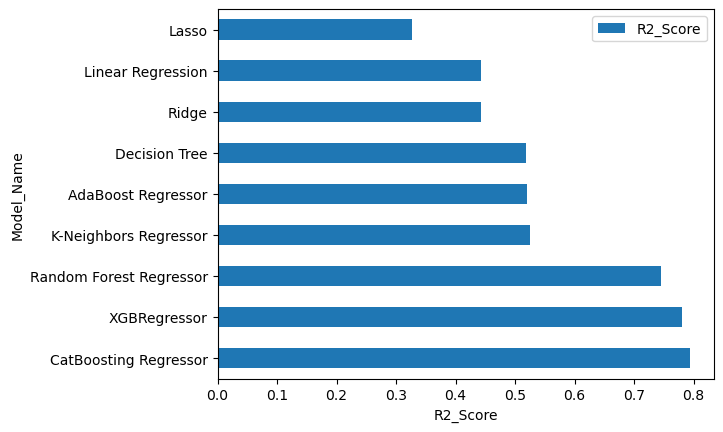

In [91]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_Name", "R2_Score"]).sort_values("R2_Score",ascending = False).plot(x="Model_Name", y="R2_Score", kind= "barh")
plt.xlabel("R2_Score")
plt.show()

### Decision Creterion:
Catboostregressor produces the best R2 score.

In [101]:

cat_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', CatBoostRegressor(verbose=False))
    ])
cat_pipeline.fit(X_train, y_train)
catboostreg=cat_pipeline.fit(X_train, y_train)
y_test_pred=catboostreg.predict(X_test)
R2_score=r2_score(y_test, y_test_pred)
print(f"The model r2 score is: {R2_score}")

The model r2 score is: 0.7939502265396308


In [102]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred, '% Diff':((y_test-y_test_pred)/y_test*100)})
pred_df

,Actual Value,Predicted Value,Difference,% Diff
11432,21,19.043641,1.956359,9.315993
41248,10,13.659151,-3.659151,-36.591511
22633,31,26.498294,4.501706,14.521633
35631,34,32.428569,1.571431,4.621857
13533,28,22.914658,5.085342,18.161935
...,...,...,...,...
26522,40,41.709432,-1.709432,-4.273579
21995,21,23.563366,-2.563366,-12.206506
284,18,20.459410,-2.459410,-13.663391
11804,34,26.808100,7.191900,21.152648


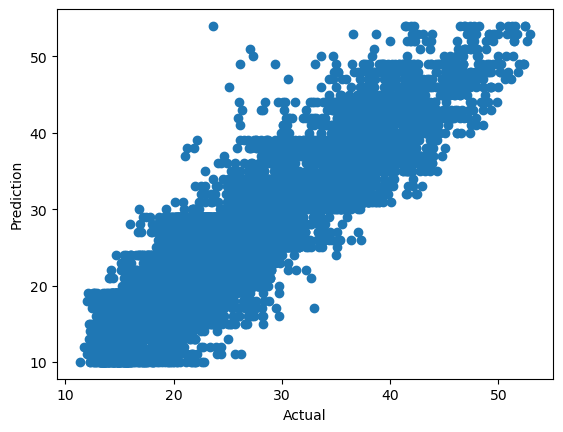

In [103]:
plt.scatter(y_test_pred, y_test);
plt.xlabel("Actual");
plt.ylabel("Prediction");
plt.show()

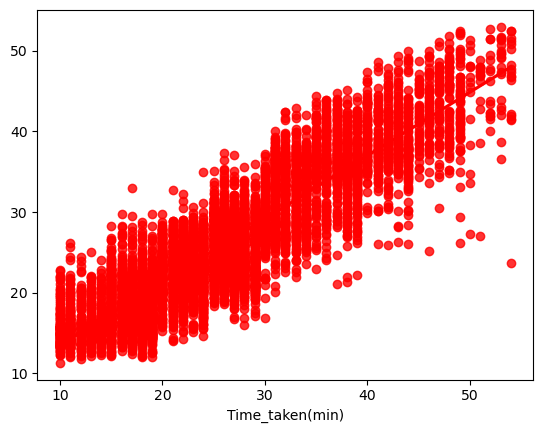

In [104]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');